In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_15_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_15_2.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.3840 - accuracy: 0.8396 - val_loss: 0.2957 - val_accuracy: 0.8697
Epoch 2/150
100000/100000 - 2s - loss: 0.2639 - accuracy: 0.8838 - val_loss: 0.2383 - val_accuracy: 0.8948
Epoch 3/150
100000/100000 - 2s - loss: 0.2246 - accuracy: 0.9002 - val_loss: 0.2171 - val_accuracy: 0.9038
Epoch 4/150
100000/100000 - 2s - loss: 0.2042 - accuracy: 0.9092 - val_loss: 0.1996 - val_accuracy: 0.9125
Epoch 5/150
100000/100000 - 2s - loss: 0.1933 - accuracy: 0.9141 - val_loss: 0.1936 - val_accuracy: 0.9145
Epoch 6/150
100000/100000 - 2s - loss: 0.1868 - accuracy: 0.9174 - val_loss: 0.1879 - val_accuracy: 0.9177
Epoch 7/150
100000/100000 - 2s - loss: 0.1786 - accuracy: 0.9218 - val_loss: 0.1843 - val_accuracy: 0.9201
Epoch 8/150
100000/100000 - 2s - loss: 0.1688 - accuracy: 0.9271 - val_loss: 0.1659 - val_accuracy: 0.9296
Epoch 9/150
100000/100000 - 2s - loss: 0.1576 - accuracy: 0.9324 - val_loss: 0.1547 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0385 - accuracy: 0.9855 - val_loss: 0.0658 - val_accuracy: 0.9783
Epoch 78/150
100000/100000 - 2s - loss: 0.0356 - accuracy: 0.9864 - val_loss: 0.0618 - val_accuracy: 0.9790
Epoch 79/150
100000/100000 - 2s - loss: 0.0372 - accuracy: 0.9859 - val_loss: 0.0632 - val_accuracy: 0.9796
Epoch 80/150
100000/100000 - 2s - loss: 0.0385 - accuracy: 0.9854 - val_loss: 0.0592 - val_accuracy: 0.9787
Epoch 81/150
100000/100000 - 2s - loss: 0.0334 - accuracy: 0.9873 - val_loss: 0.0622 - val_accuracy: 0.9799
Epoch 82/150
100000/100000 - 2s - loss: 0.0373 - accuracy: 0.9861 - val_loss: 0.0654 - val_accuracy: 0.9782
Epoch 83/150
100000/100000 - 2s - loss: 0.0390 - accuracy: 0.9852 - val_loss: 0.0614 - val_accuracy: 0.9800
Epoch 84/150
100000/100000 - 2s - loss: 0.0338 - accuracy: 0.9872 - val_loss: 0.0570 - val_accuracy: 0.9809
Epoch 85/150
100000/100000 - 2s - loss: 0.0342 - accuracy: 0.9870 - val_loss: 0.0652 - val_accuracy: 0.9786
Epoch 86/150
100000/100000 -

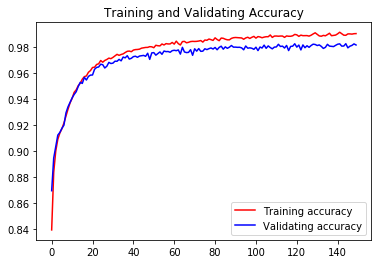

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_15_2_model.h5')